# Selection of two or three features from the MSFT database for prediction with RNN

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

ms=yf.download('MSFT',start='2012-01-01',end='2025-05-01')

/tmp/ipython-input-3019811579.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ms=yf.download('MSFT',start='2012-01-01',end='2025-05-01')
[*********************100%***********************]  1 of 1 completed


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN

def convert_data(data,x_step,y_step=1):
  X,Y=[],[]
  for i in range(len(data)-x_step):
    start=i
    stop=i+x_step
    X.append(data[start:stop])
    Y.append(data[stop])
  return np.array(X),np.array(Y)

from sklearn.preprocessing import MinMaxScaler

# Three Features: High value + Low value + Volume

In [14]:
train1 =ms.loc[:"2024"].High.values
test1 =ms.loc["2025":].High.values
scaler = MinMaxScaler()
train1_scaled=scaler.fit_transform(train1)
test1_scaled=scaler.transform(test1)

train2 =ms.loc[:"2024"].Low.values
test2 =ms.loc["2025":].Low.values
scaler = MinMaxScaler()
train2_scaled=scaler.fit_transform(train2)
test2_scaled=scaler.transform(test2)

train3 =ms.loc[:"2024"].Low.values
test3 =ms.loc["2025":].Low.values
scaler = MinMaxScaler()
train3_scaled=scaler.fit_transform(train3)
test3_scaled=scaler.transform(test3)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 5, 64)          │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0233
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0733e-04
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0781e-04
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6057e-04
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5210e-04
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5265e-04
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9672e-04
Epoch 9/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1198e-04
Epoch 10/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4800e-04
Epoch 11/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6769e-04
Epoch 12/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.4257e-04
Epoch 13/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2185e-04
Epoch 14/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.4196e-04
Epoch 15/

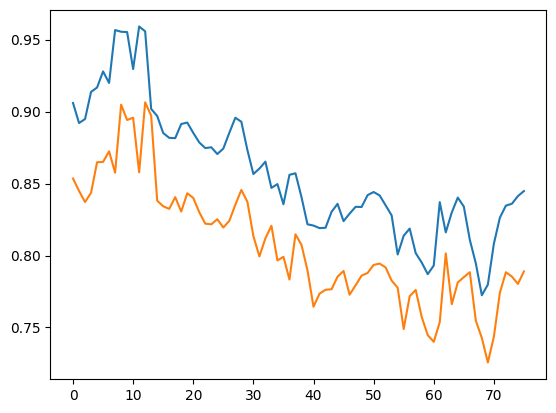

In [10]:
x_step=5

X_train,y_train = convert_data(train1_scaled,x_step)
X_test,y_test = convert_data(test1_scaled,x_step)

model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(units=64,return_sequences=True))
model.add(SimpleRNN(units=64,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=16)

predicted=model.predict(X_test)

plt.plot(y_test)
plt.plot(predicted)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


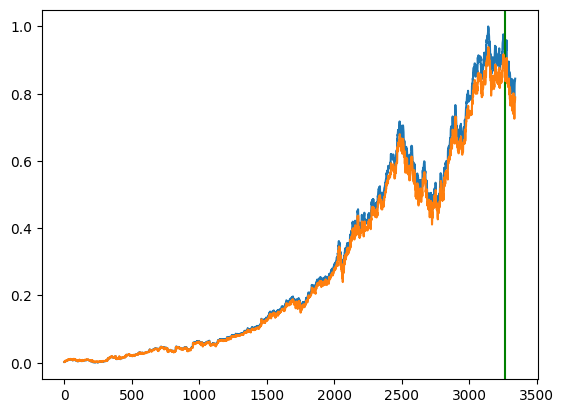

In [11]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(real)
plt.axvline(len(y_train), color="g")
plt.plot(predicted)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 5, 64)          │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0293
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2384e-04
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0672e-04
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2058e-04
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7526e-04
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8224e-04
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8034e-04
Epoch 9/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0445e-04
Epoch 10/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5074e-04
Epoch 11/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.8308e-04
Epoch 12/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.8812e-04
Epoch 13/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6416e-04
Epoch 14/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3692e-04
Epoch 15/

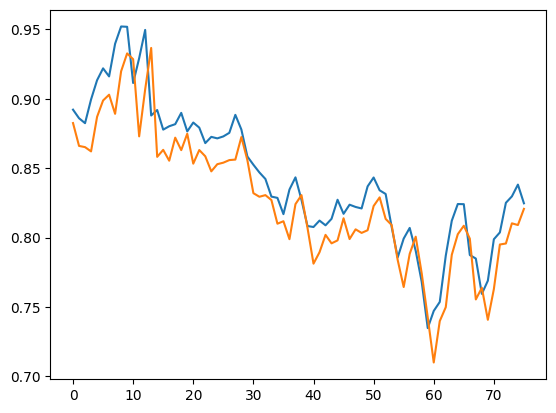

In [12]:
x_step=5

X_train,y_train = convert_data(train2_scaled,x_step)
X_test,y_test = convert_data(test2_scaled,x_step)

model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(units=64,return_sequences=True))
model.add(SimpleRNN(units=64,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=16)

predicted=model.predict(X_test)

plt.plot(y_test)
plt.plot(predicted)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


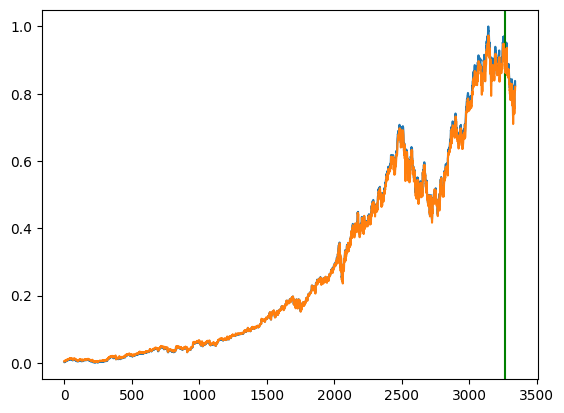

In [13]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(real)
plt.axvline(len(y_train), color="g")
plt.plot(predicted)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 5, 64)          │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0356
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9236e-04
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3863e-04
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5704e-04
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6535e-04
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0065e-04
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8556e-04
Epoch 9/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4971e-04
Epoch 10/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3502e-04
Epoch 11/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6944e-04
Epoch 12/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5587e-04
Epoch 13/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6009e-04
Epoch 14/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5901e-04
Epoch 15/

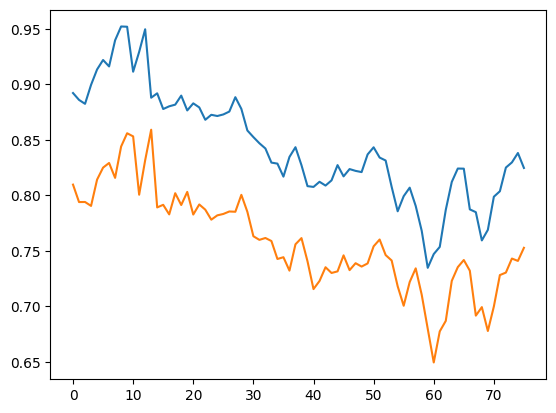

In [15]:
x_step=5

X_train,y_train = convert_data(train3_scaled,x_step)
X_test,y_test = convert_data(test3_scaled,x_step)

model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(units=64,return_sequences=True))
model.add(SimpleRNN(units=64,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=16)

predicted=model.predict(X_test)

plt.plot(y_test)
plt.plot(predicted)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


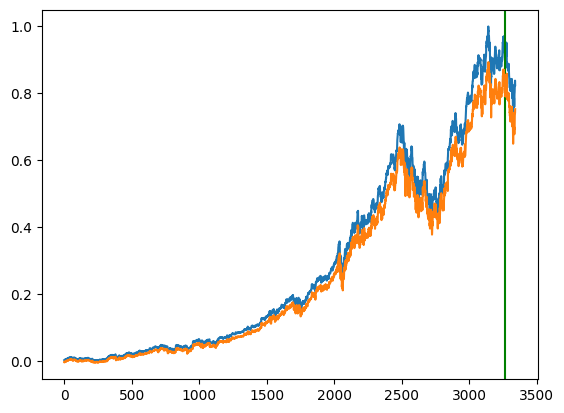

In [16]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(real)
plt.axvline(len(y_train), color="g")
plt.plot(predicted)